# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Dzul Fikri
- Email: dzulfikri628@gmail.com
- Id Dicoding: fikriluzd

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


### Menyiapkan data yang akan diguankan

## Data Understanding

### 1.Data Loading

In [2]:
# Load dataset
df_students = pd.read_csv("data.csv",sep=";")
df_students.head(20)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
# Resume information dataset
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# Deskriptive analysis
df_students.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [5]:
admission_grades = df_students['Curricular_units_1st_sem_grade']
print(admission_grades)

# Menghitung nilai maksimum
max_grade = admission_grades.max()
print(f"Nilai Maksimum: {max_grade}")

# Menghitung nilai minimum
min_grade = admission_grades.min()
print(f"Nilai Minimum: {min_grade}")

0        0.000000
1       14.000000
2        0.000000
3       13.428571
4       12.333333
          ...    
4419    13.600000
4420    12.000000
4421    14.912500
4422    13.800000
4423    11.666667
Name: Curricular_units_1st_sem_grade, Length: 4424, dtype: float64
Nilai Maksimum: 18.875
Nilai Minimum: 0.0


### 2. Data Checking

In [6]:
# Cek Missing Value
df_students.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [7]:
# Cek Duplicated Value
df_students.duplicated().sum()

np.int64(0)

## Data Preparation / Preprocessing

### 1. EDA (Exploratory Data Analysis)

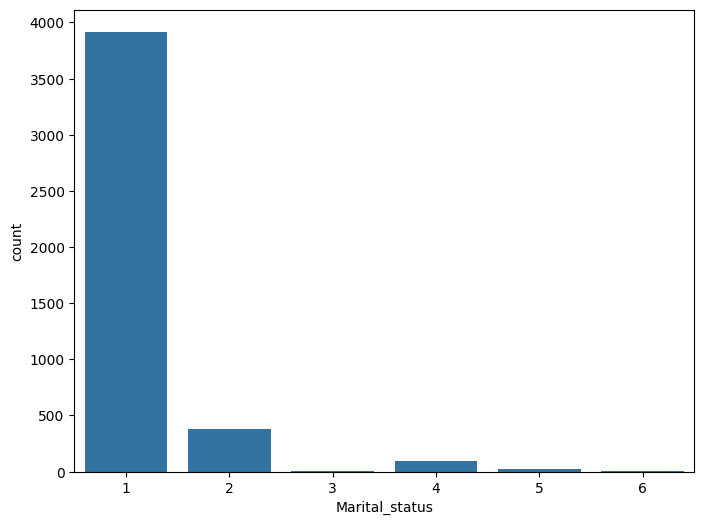

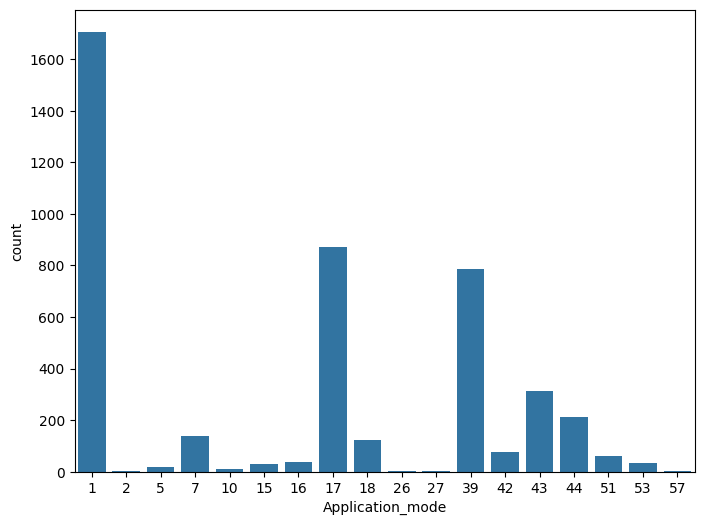

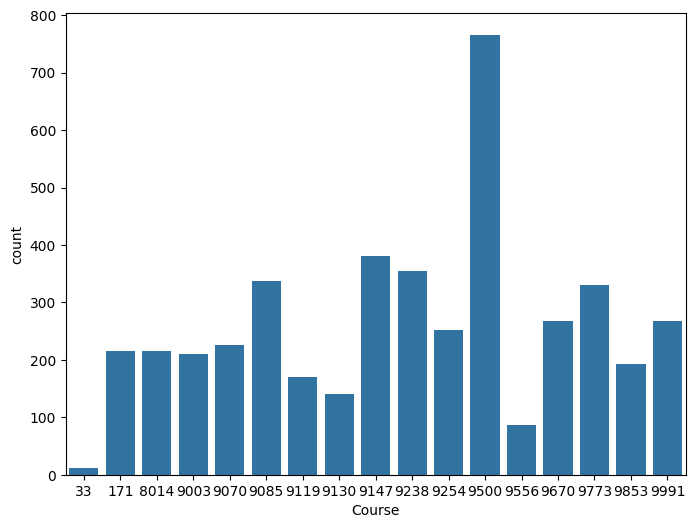

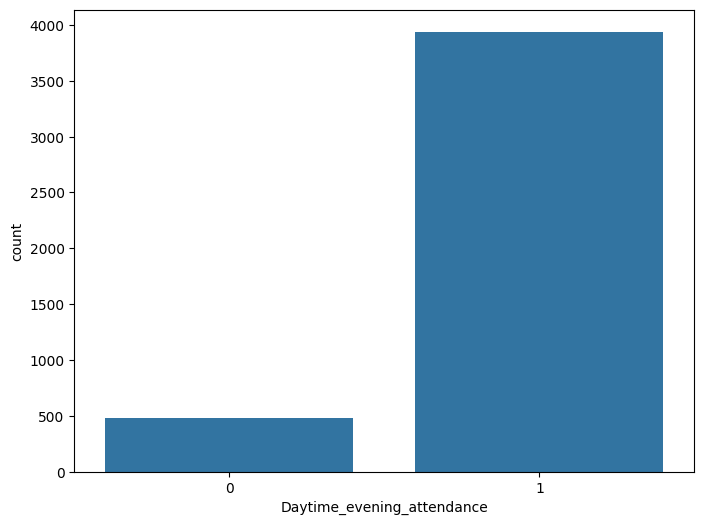

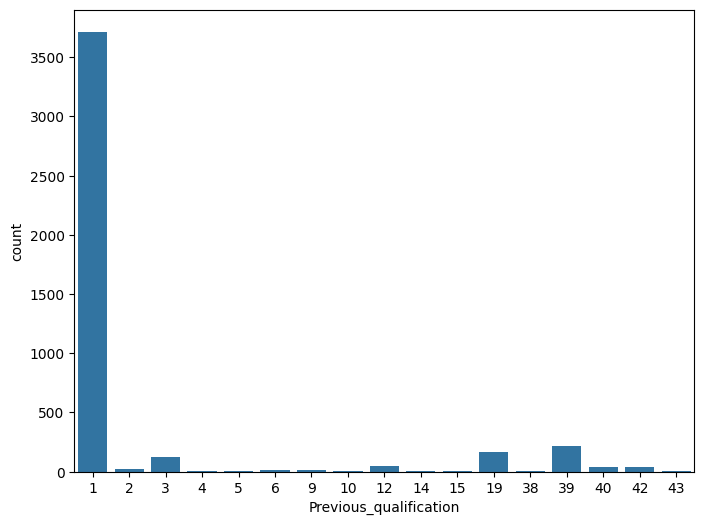

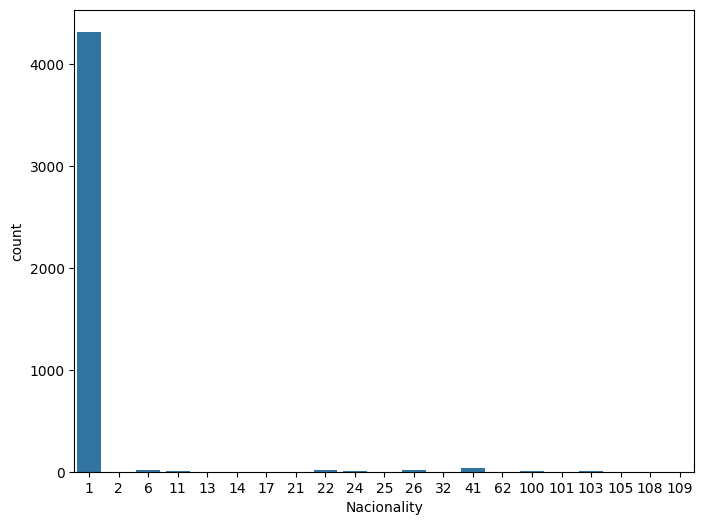

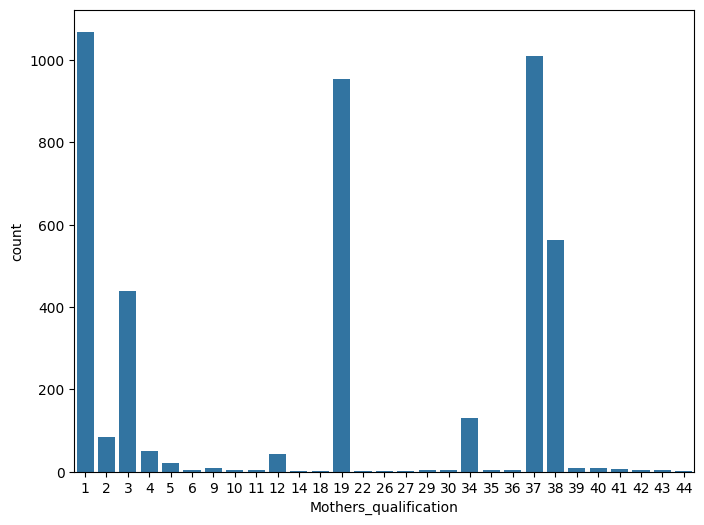

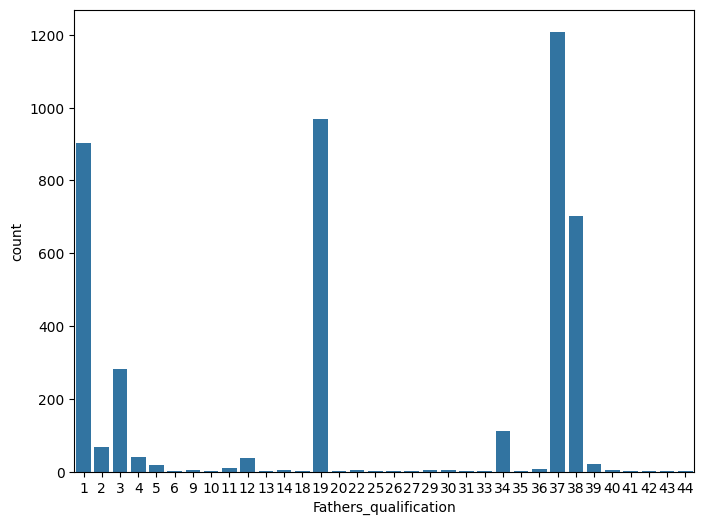

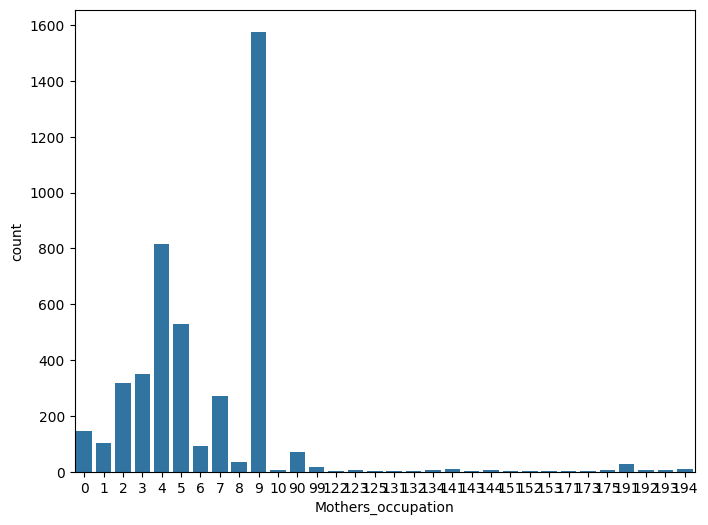

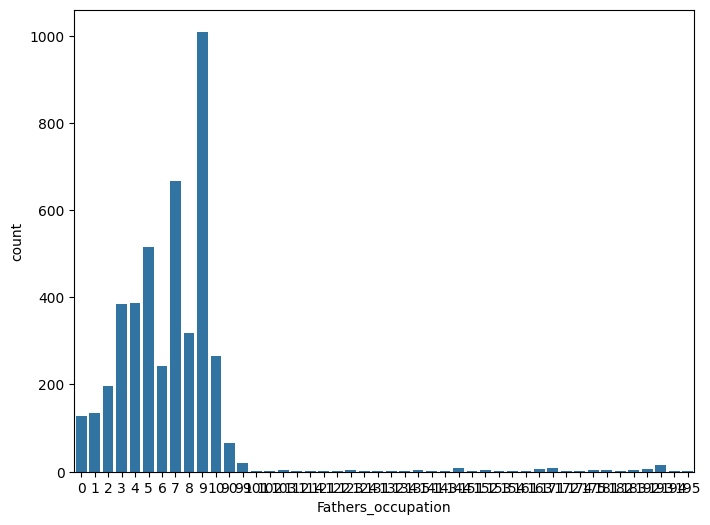

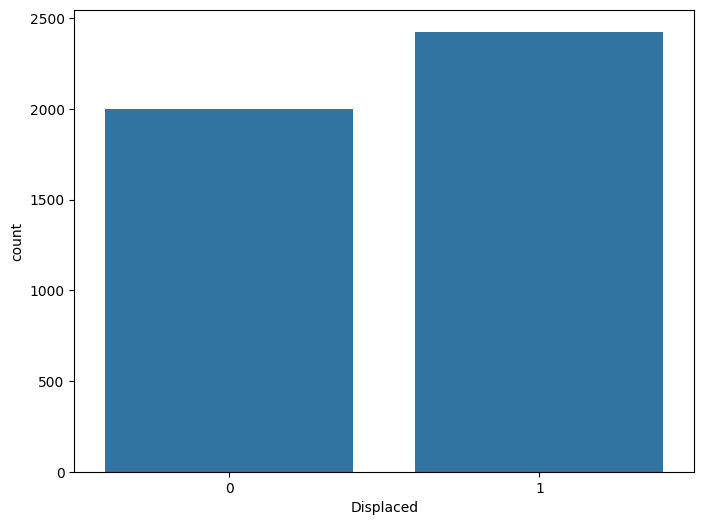

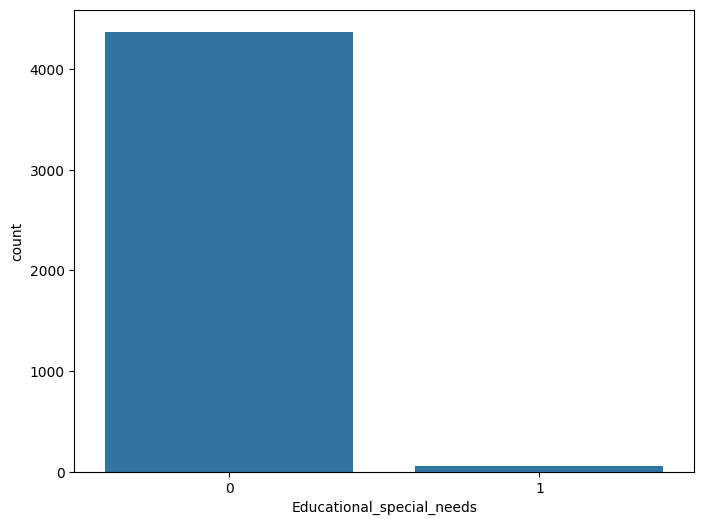

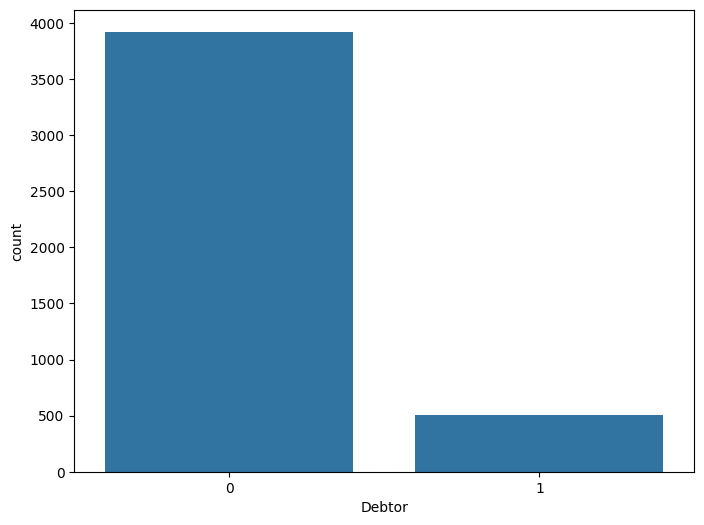

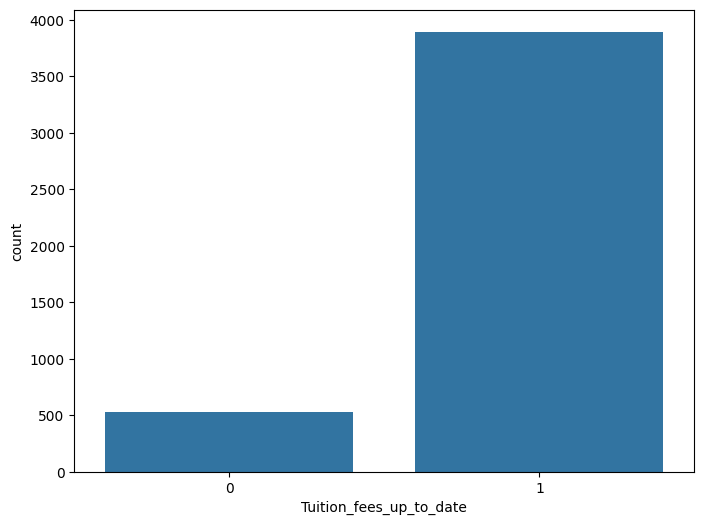

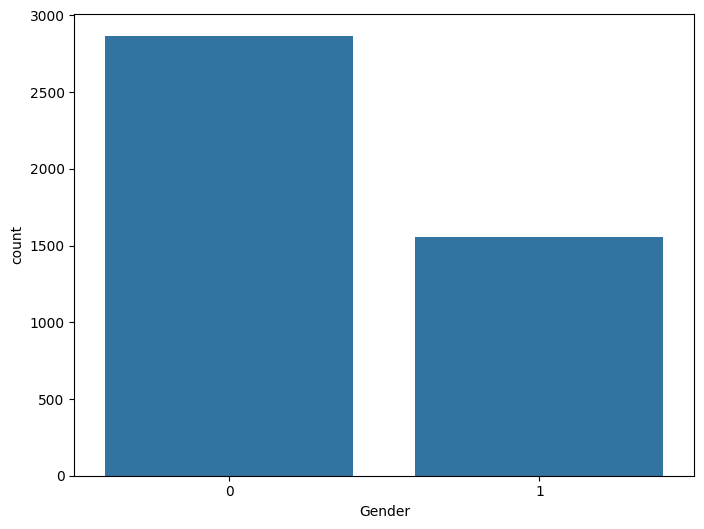

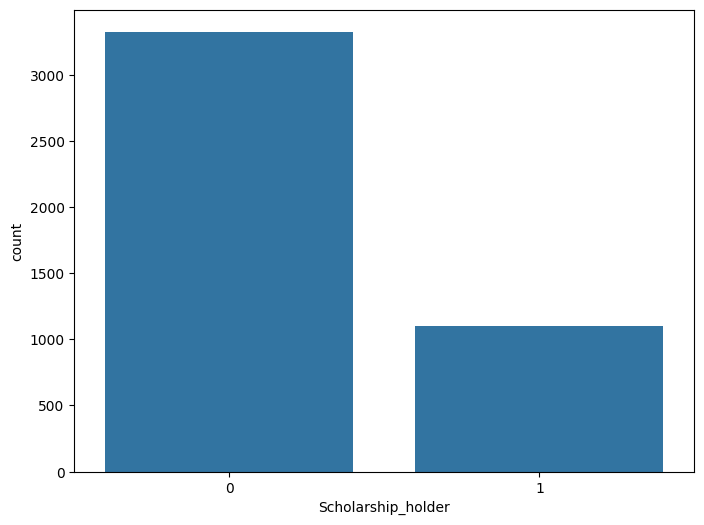

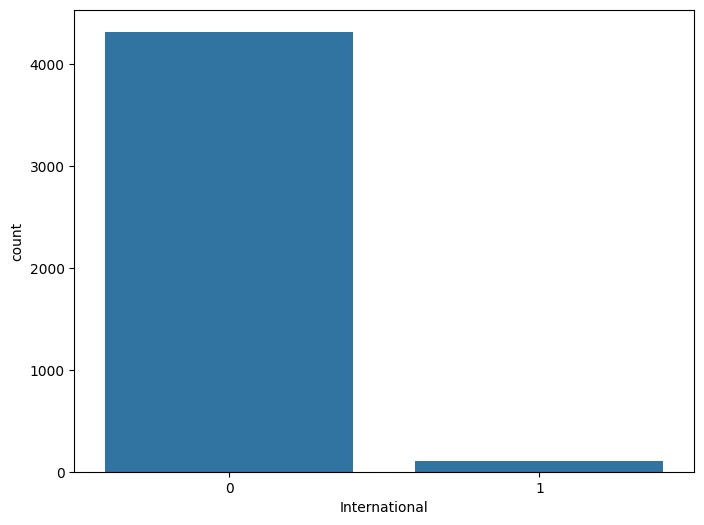

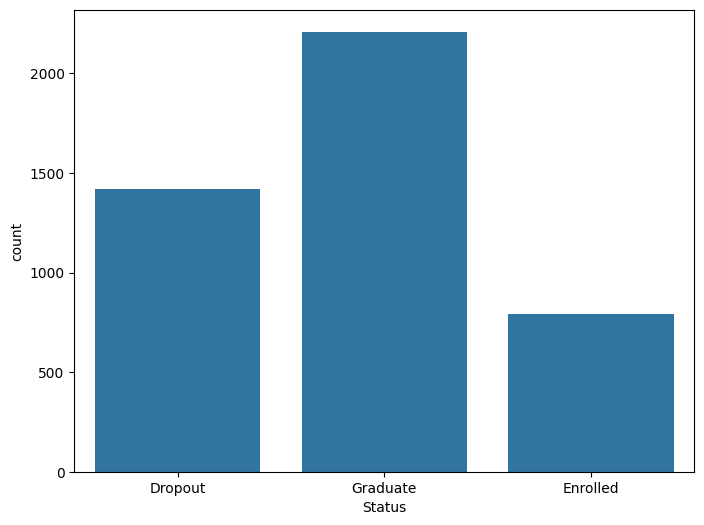

In [8]:
# Categorical Feature
categorical_col = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International','Status'
]

categorical_feature = df_students[categorical_col]

# # Visualize Categorical Features
for categories in categorical_feature:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=categorical_feature, x=categories)
    plt.xticks()
    plt.show()

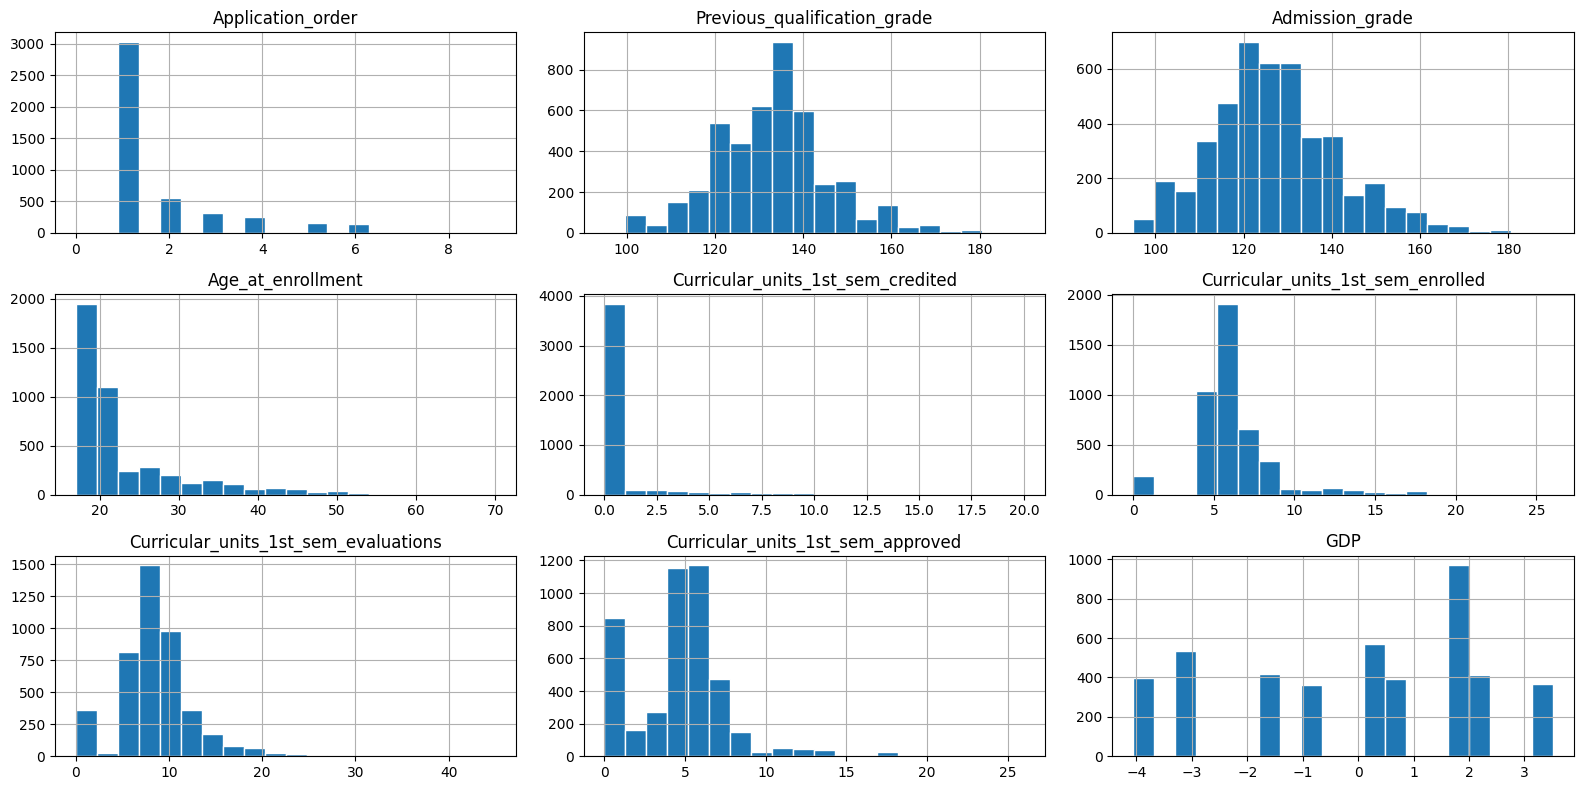

In [9]:
# Numerical Colomn
numerical_col = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'GDP'
]

# Numerical Feature
numerical_feature = df_students[numerical_col]

# Visualize Numerical Feature
numerical_feature.hist(figsize=(16, 8), bins=20, edgecolor='white')
plt.subplots_adjust(hspace=0.4, wspace=20)
plt.tight_layout()
plt.show()

### 2. Feature Selection

In [10]:
# Filter data that only contains "graduate" & "dropout" status
df_filter = df_students[df_students['Status'].isin(['Graduate','Dropout'])].copy()

# Convert status into numerical
df_filter['Status'] =  df_filter['Status'].map({'Graduate':1,'Dropout':0})

df_filter.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [11]:
# Float to int data type
df_filter['Previous_qualification_grade'] = df_filter['Previous_qualification_grade'].astype(int)
df_filter['Admission_grade'] = df_filter['Admission_grade'].astype(int)
df_filter['Curricular_units_1st_sem_grade'] = df_filter['Curricular_units_1st_sem_grade'].astype(int)
df_filter['Curricular_units_2nd_sem_grade'] = df_filter['Curricular_units_2nd_sem_grade'].astype(int)
df_filter['Unemployment_rate'] = df_filter['Unemployment_rate'].astype(int)
df_filter['Inflation_rate'] = df_filter['Inflation_rate'].astype(int)
df_filter['GDP'] = df_filter['GDP'].astype(int)

# Save clean dataset to create dashboard in looker studio
df_filter.to_csv("student_clean.csv", index=False)
df_filter.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122,1,19,12,...,0,0,0,0,0,0,10,1,1,0
1,1,15,1,9254,1,1,160,1,1,3,...,0,6,6,6,13,0,13,0,0,1
2,1,1,5,9070,1,1,122,1,37,37,...,0,6,0,0,0,0,10,1,1,0
3,1,17,2,9773,1,1,122,1,38,37,...,0,6,10,5,12,0,9,0,-3,1
4,2,39,1,8014,0,1,100,1,37,38,...,0,6,6,6,13,0,13,0,0,1


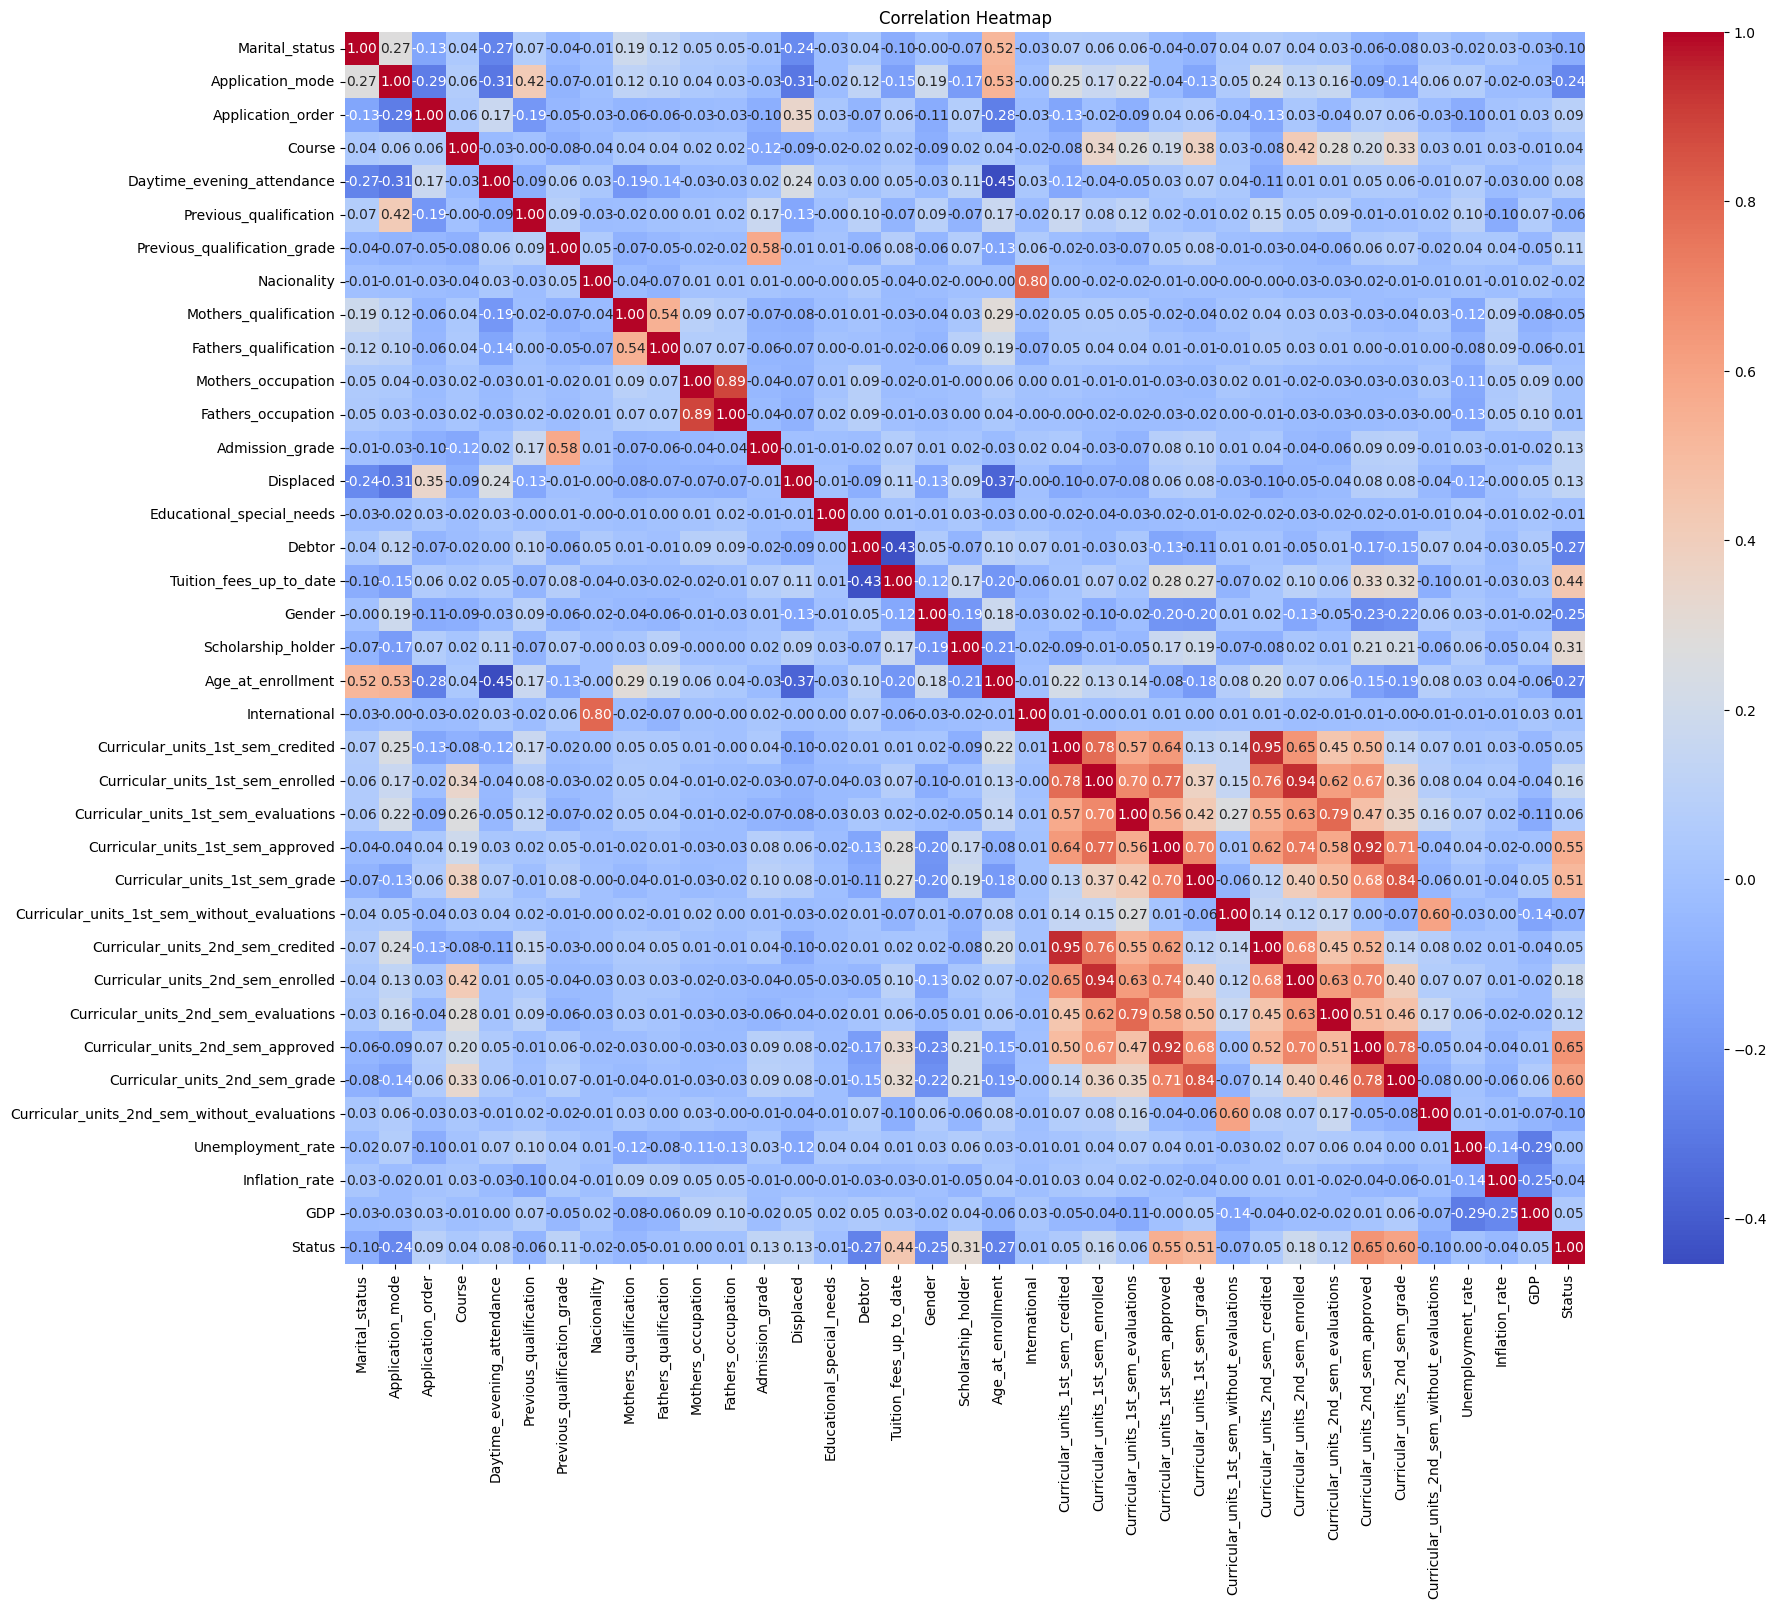

In [12]:
# Correlation map
correlation_df = df_filter.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Drop variabel that have one dominant value
df_filter = df_filter.drop(columns=['Educational_special_needs','International','Nacionality'])


# Combined 1st & 2nd Semester Curricular units
df_filter['Total_Curricular_Credited'] = df_filter['Curricular_units_1st_sem_credited'] + df_filter['Curricular_units_2nd_sem_credited']
df_filter['Total_Curricular_Enrolled'] = df_filter['Curricular_units_1st_sem_enrolled'] + df_filter['Curricular_units_2nd_sem_enrolled']
df_filter['Total_Curricular_Approved'] = df_filter['Curricular_units_1st_sem_approved'] + df_filter['Curricular_units_2nd_sem_approved']
df_filter['Total_Curricular_Evaluations'] = df_filter['Curricular_units_1st_sem_evaluations'] + df_filter['Curricular_units_2nd_sem_evaluations']
df_filter['Total_Curricular_Without_Evaluation'] = df_filter['Curricular_units_1st_sem_without_evaluations'] + df_filter['Curricular_units_2nd_sem_without_evaluations']

# Drop original features:
df_filter = df_filter.drop(columns=[
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_without_evaluations',
])

# Drop one of variabel that shows parents background
df_filter = df_filter.drop(columns=['Mothers_qualification', 'Fathers_qualification'])

df_filter.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Marital_status                       3630 non-null   int64
 1   Application_mode                     3630 non-null   int64
 2   Application_order                    3630 non-null   int64
 3   Course                               3630 non-null   int64
 4   Daytime_evening_attendance           3630 non-null   int64
 5   Previous_qualification               3630 non-null   int64
 6   Previous_qualification_grade         3630 non-null   int64
 7   Mothers_occupation                   3630 non-null   int64
 8   Fathers_occupation                   3630 non-null   int64
 9   Admission_grade                      3630 non-null   int64
 10  Displaced                            3630 non-null   int64
 11  Debtor                               3630 non-null   int64
 1

### 3. Data Splitting & Over Sampling

In [14]:
df_filter['Status'].value_counts()

,count
Status,
1,2209
0,1421


In [15]:
# Split label
X = df_filter.drop(columns=['Status'])
y = df_filter['Status']

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Smote method for oevrsamling minority label category
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## Modeling

In [16]:
# Initialize Model
model = RandomForestClassifier()

# Train Model
model.fit(X_train_resampled, y_train_resampled)

# predict
y_pred = model.predict(X_test)

## Evaluation

In [17]:
# Matriks Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9035812672176309
Precision: 0.9040511727078892
Recall: 0.9443207126948775
F1 Score: 0.9237472766884531


In [18]:
# Save Model
with open('model.pkl','wb') as file:
  pickle.dump(model,file)